# Demo notebook for Huawei Public 2025 data release

This notebook explains how to load an analyze the Huawei Public 2025 data.

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
from tqdm import tqdm
import seaborn as sns
import gc
sns.set_theme()

In [6]:
# Define regions we want to analyze
region_names = ['R1', 'R2', 'R3', 'R4', 'R5']

# Define root for quantiles
rt = '../datasets/cold_start_dataset/quantiles'

# Define root for cold starts
rt_cold_start = '../datasets/cold_start_dataset/cold_start'

# Define root for runtime and trigger type file
rt_funcID_runtime_triggerType = '../datasets/cold_start_dataset/runtime_triggerType/df_funcID_runtime_triggerType.csv'

In [7]:
# Read cold starts

for region_name_i in region_names:
    print(f'Reading {region_name_i}')
    filenames_list_i = sorted(glob(rt_cold_start+f'/{region_name_i}/*.csv'))
    dfs_list = []
    for filename_i in tqdm(filenames_list_i):
        df_i = pd.read_csv(filename_i)
        dfs_list.append(df_i)
    df_xx = pd.concat(dfs_list)
    df_xx['region'] = region_name_i
    del dfs_list, df_xx 
    gc.collect()

df_all_cold_starts = pd.concat(df_cold_start_dict.values())

Reading R1


  0%|          | 0/31 [00:00<?, ?it/s]

100%|██████████| 31/31 [00:17<00:00,  1.79it/s]


Reading R2


100%|██████████| 31/31 [00:05<00:00,  6.10it/s]


Reading R3


100%|██████████| 31/31 [00:00<00:00, 49.44it/s]


Reading R4


100%|██████████| 31/31 [00:03<00:00,  9.77it/s]


Reading R5


100%|██████████| 31/31 [00:01<00:00, 18.93it/s]


<Axes: xlabel='totalCost_cold_start', ylabel='Probability'>

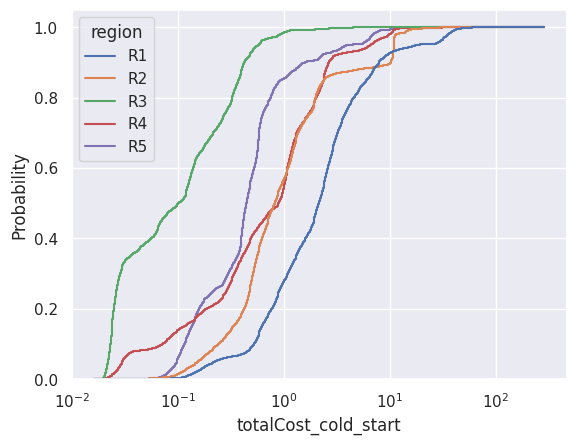

In [8]:
# Plot of cold start times per region

sns.histplot(data=df_all_cold_starts, 
             bins=500,
             fill=False,
             element="step",
             x='totalCost_cold_start', 
             hue='region', 
             stat='probability', 
             cumulative=True, 
             log_scale=[True,False], 
             common_norm=False)

In [21]:
quantiles_list = [0, 50, 90, 95, 'avg', 'std']

quantiles_list = [f'quantile_{item:003}' if isinstance(item, int) else item for item in quantiles_list]

print(quantiles_list)

metrics_dict = {
    'requests': dict.fromkeys(['sum']),
    'num_pods': dict.fromkeys(['sum']),
    'num_cold_starts': dict.fromkeys(['sum']),
    'cpu_usage': dict.fromkeys(quantiles_list),
    'memory_usage': dict.fromkeys(quantiles_list),

    'totalCost_frontend': dict.fromkeys(quantiles_list),
    'totalCost': dict.fromkeys(quantiles_list),
    'totalCost_cold_start': dict.fromkeys(quantiles_list),

    'workerCost': dict.fromkeys(quantiles_list),
    'frontendCost': dict.fromkeys(quantiles_list),
    'readBodyCost': dict.fromkeys(quantiles_list),

    'writeRspCost': dict.fromkeys(quantiles_list),
    'runtimeCost': dict.fromkeys(quantiles_list),
    'busCost': dict.fromkeys(quantiles_list),

    'requestBodySize': dict.fromkeys(quantiles_list),

    'podAllocationCost': dict.fromkeys(quantiles_list),
    'deployCodeCost': dict.fromkeys(quantiles_list),
    'deployDependencyCost': dict.fromkeys(quantiles_list),
    'schedulingCost': dict.fromkeys(quantiles_list),
}

['quantile_000', 'quantile_050', 'quantile_090', 'quantile_095', 'avg', 'std']


In [30]:
# Read totalCost_cold_start quantiles
region_name_i = 'R1'
n_days = 3

metric_family_list = sorted(list(metrics_dict.keys()))

for metric_family in metric_family_list:
    print(metric_family)
    metric_subfamily_list = sorted(list(metrics_dict[metric_family].keys()))

    for submetric in tqdm(metric_subfamily_list):
        if submetric=='sum':
            rt_i = f'{rt}/{region_name_i}/{metric_family}/*.csv'
        else:
            rt_i = f'{rt}/{region_name_i}/{metric_family}_{submetric}/*.csv'

        filenames_i = sorted(glob(rt_i))

        dfs_list_i = []
        for f_i in filenames_i[:n_days]:
            df_ii = pd.read_csv(f_i)
            dfs_list_i.append(df_ii)
        df_i = pd.concat(dfs_list_i)

        metrics_dict[metric_family][submetric] = df_i


busCost


100%|██████████| 6/6 [00:13<00:00,  2.20s/it]


cpu_usage


100%|██████████| 6/6 [00:12<00:00,  2.12s/it]


deployCodeCost


100%|██████████| 6/6 [00:11<00:00,  1.96s/it]


deployDependencyCost


100%|██████████| 6/6 [00:11<00:00,  1.89s/it]


frontendCost


100%|██████████| 6/6 [00:12<00:00,  2.12s/it]


memory_usage


100%|██████████| 6/6 [00:13<00:00,  2.24s/it]


num_cold_starts


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


num_pods


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


podAllocationCost


100%|██████████| 6/6 [00:11<00:00,  1.95s/it]


readBodyCost


100%|██████████| 6/6 [00:13<00:00,  2.22s/it]


requestBodySize


100%|██████████| 6/6 [00:12<00:00,  2.04s/it]


requests


100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


runtimeCost


100%|██████████| 6/6 [00:14<00:00,  2.47s/it]


schedulingCost


100%|██████████| 6/6 [00:11<00:00,  1.96s/it]


totalCost


100%|██████████| 6/6 [00:13<00:00,  2.19s/it]


totalCost_cold_start


100%|██████████| 6/6 [00:11<00:00,  1.91s/it]


totalCost_frontend


100%|██████████| 6/6 [00:12<00:00,  2.12s/it]


workerCost


100%|██████████| 6/6 [00:13<00:00,  2.28s/it]


writeRspCost


100%|██████████| 6/6 [00:12<00:00,  2.09s/it]


In [31]:
df_top = metrics_dict['requests']['sum'][metrics_dict['requests']['sum'].columns[2:]].sum().reset_index()
df_top = df_top.sort_values(by=0, ascending=False)
df_top

index             0
917   1197---197---pool30-1800-2048  1.033839e+09
943     1014---274---pool24-600-512  5.497065e+08
944      817---274---pool24-600-512  4.964862e+08
942      405---274---pool24-600-512  4.964754e+08
945      457---274---pool24-600-512  2.093703e+08
...                             ...           ...
1810     137---431---pool22-300-128  0.000000e+00
1811    1415---536---pool22-300-128  0.000000e+00
1812     2020---58---pool22-300-128  0.000000e+00
1813     884---431---pool23-400-256  0.000000e+00
2483     241---507---pool22-300-128  0.000000e+00

[2484 rows x 2 columns]

In [35]:
funcID_list = df_top['index'].head(10).to_list()
funcID_list

['1197---197---pool30-1800-2048',
 '1014---274---pool24-600-512',
 '817---274---pool24-600-512',
 '405---274---pool24-600-512',
 '457---274---pool24-600-512',
 '1538---197---pool28-1400-1536',
 '1206---24---pool26-1000-1024',
 '101---197---pool30-1800-2048',
 '2028---197---pool30-1800-2048',
 '2119---197---pool28-1400-1536']

  0%|          | 0/10 [00:00<?, ?it/s]/tmp/ipykernel_1493205/2090270632.py:62: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax[row_idx, col_idx].set_ylim(0, max_ylim*1.05)



No metrics left


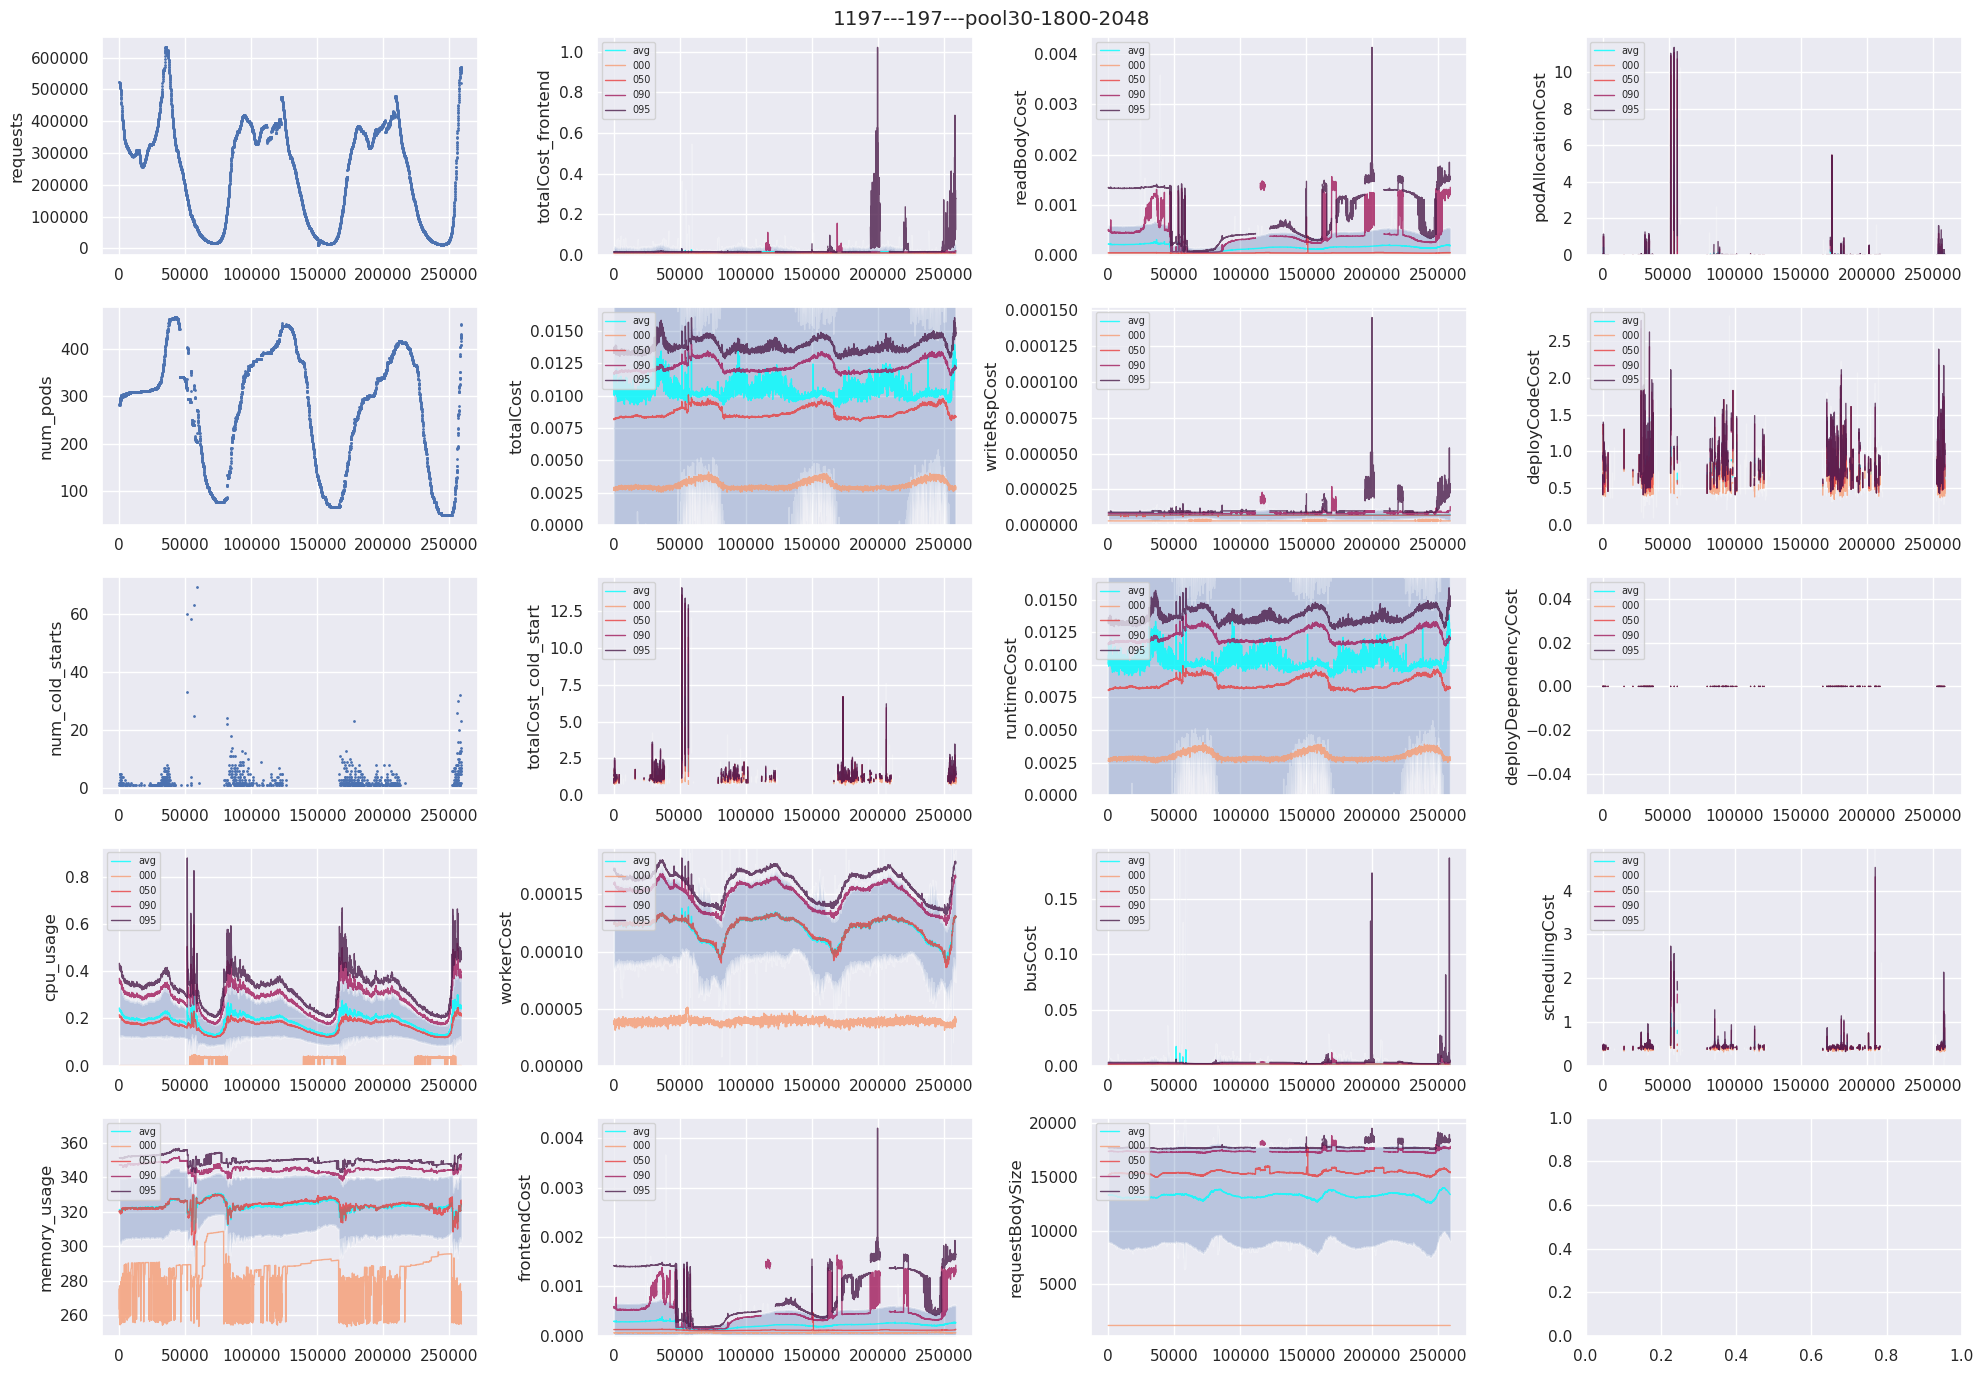

 10%|█         | 1/10 [00:07<01:08,  7.65s/it]


No metrics left


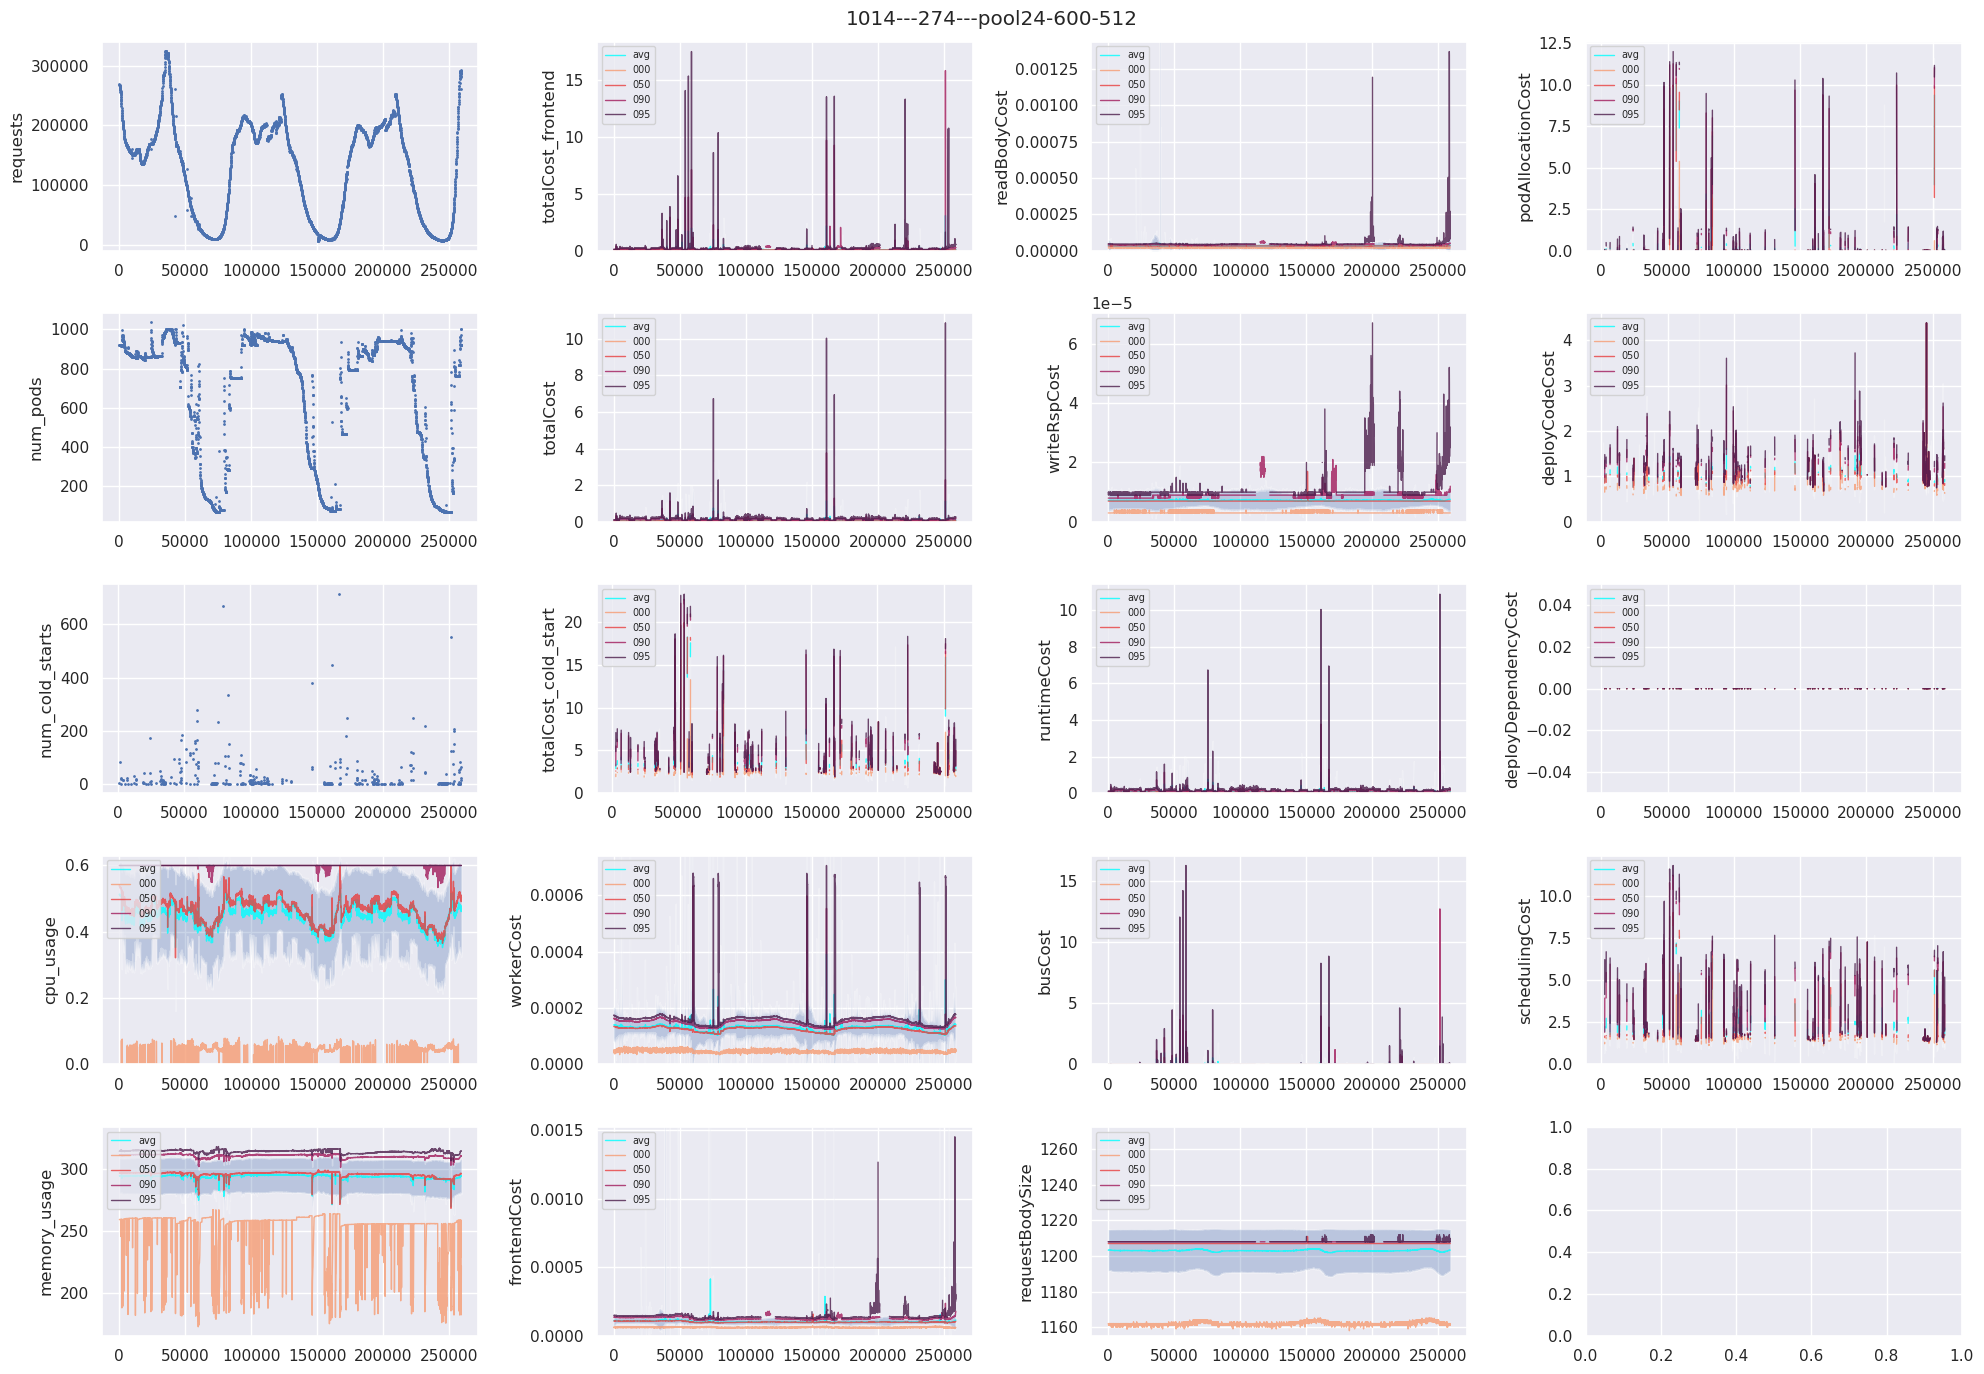

 20%|██        | 2/10 [00:15<01:00,  7.55s/it]


No metrics left


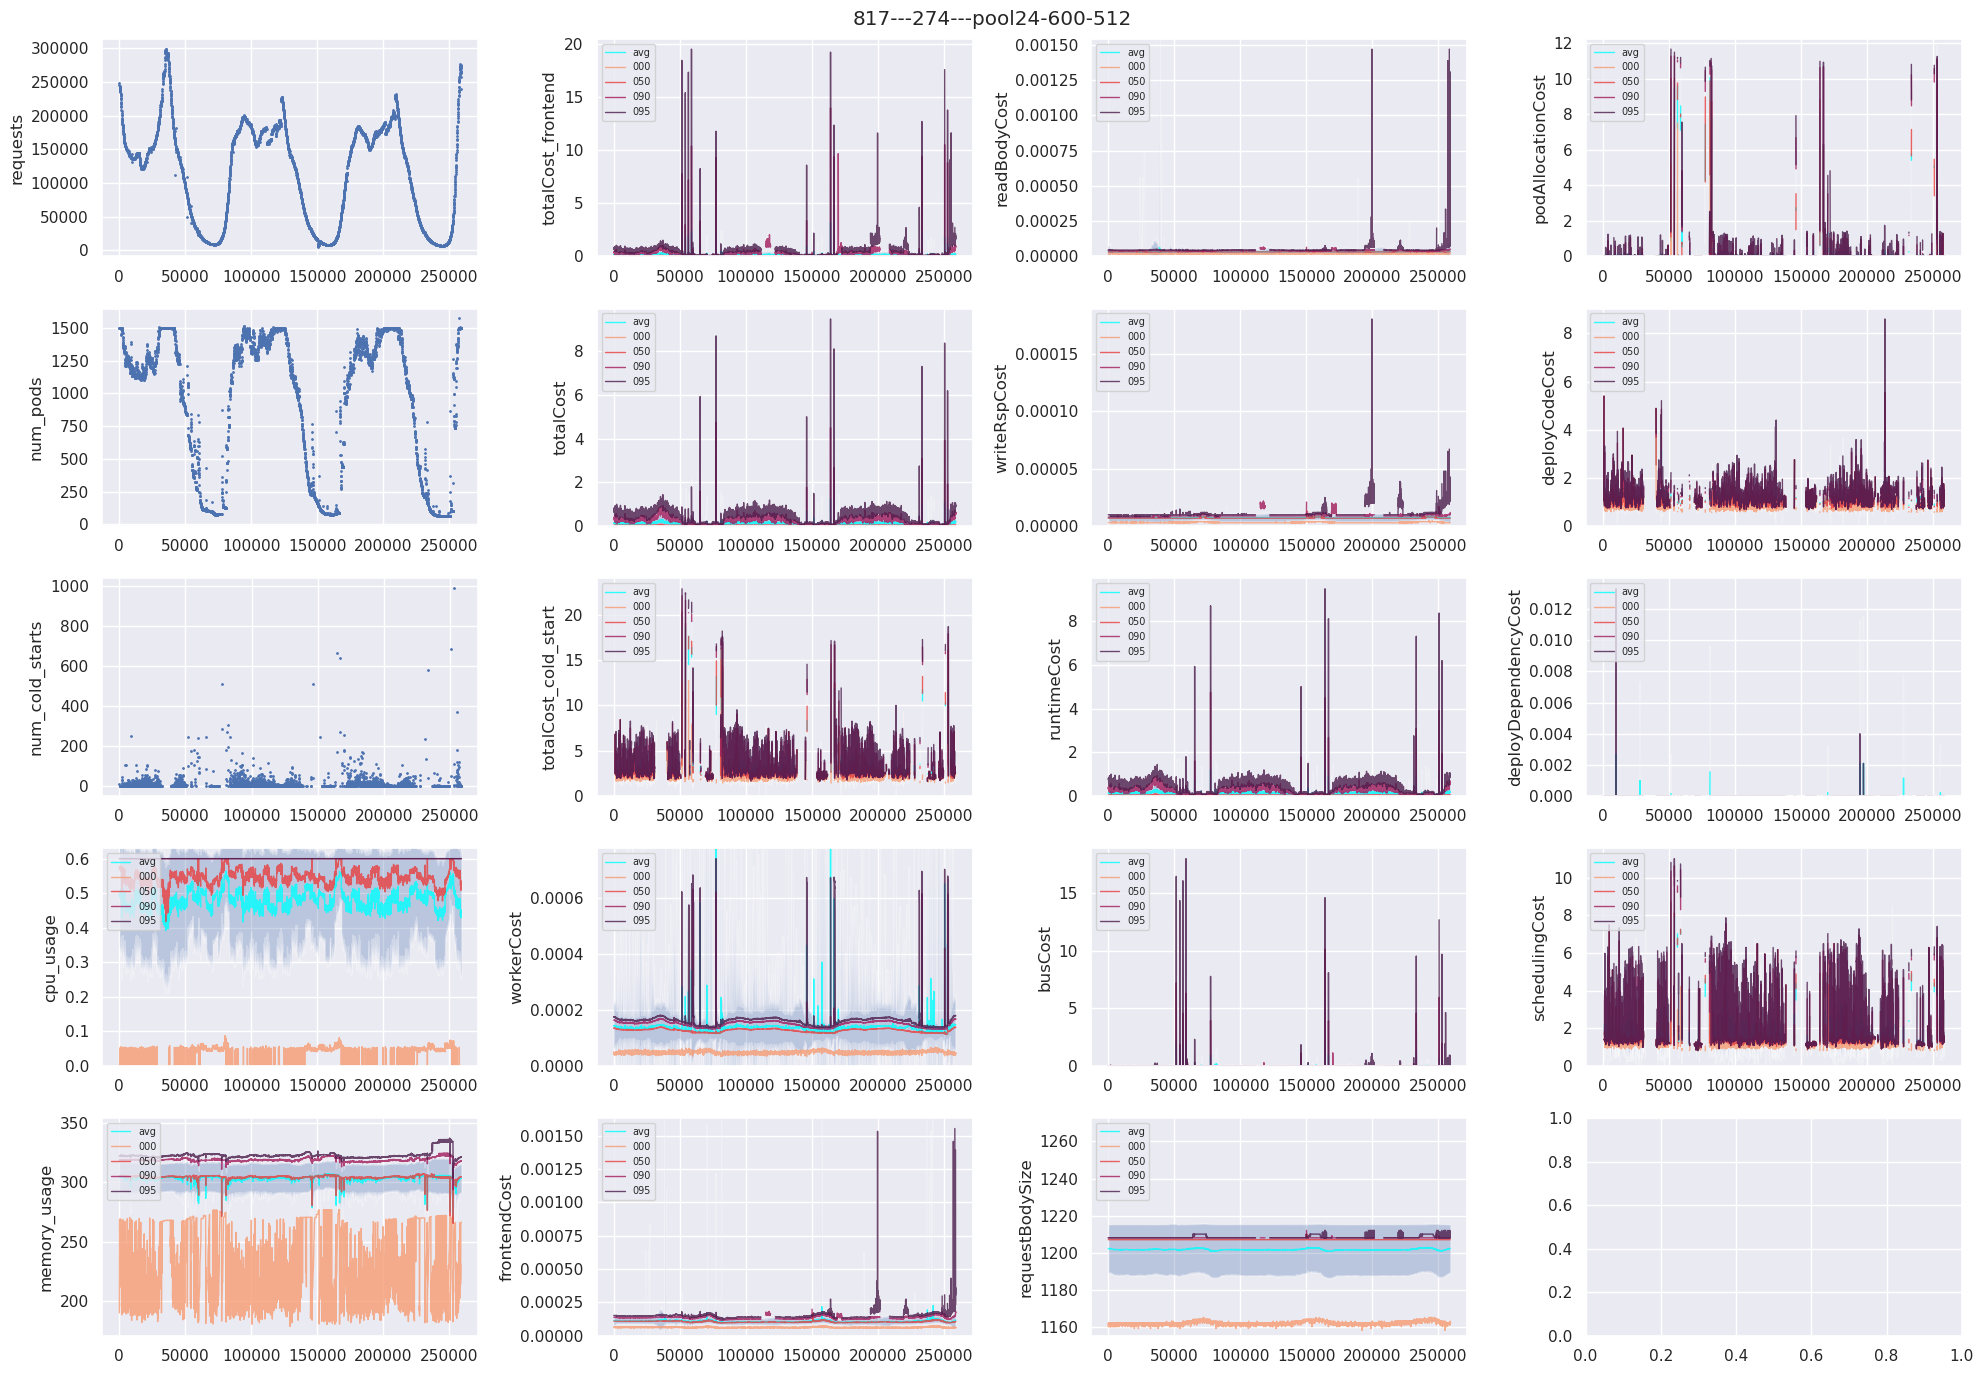

 30%|███       | 3/10 [00:23<00:54,  7.75s/it]


No metrics left


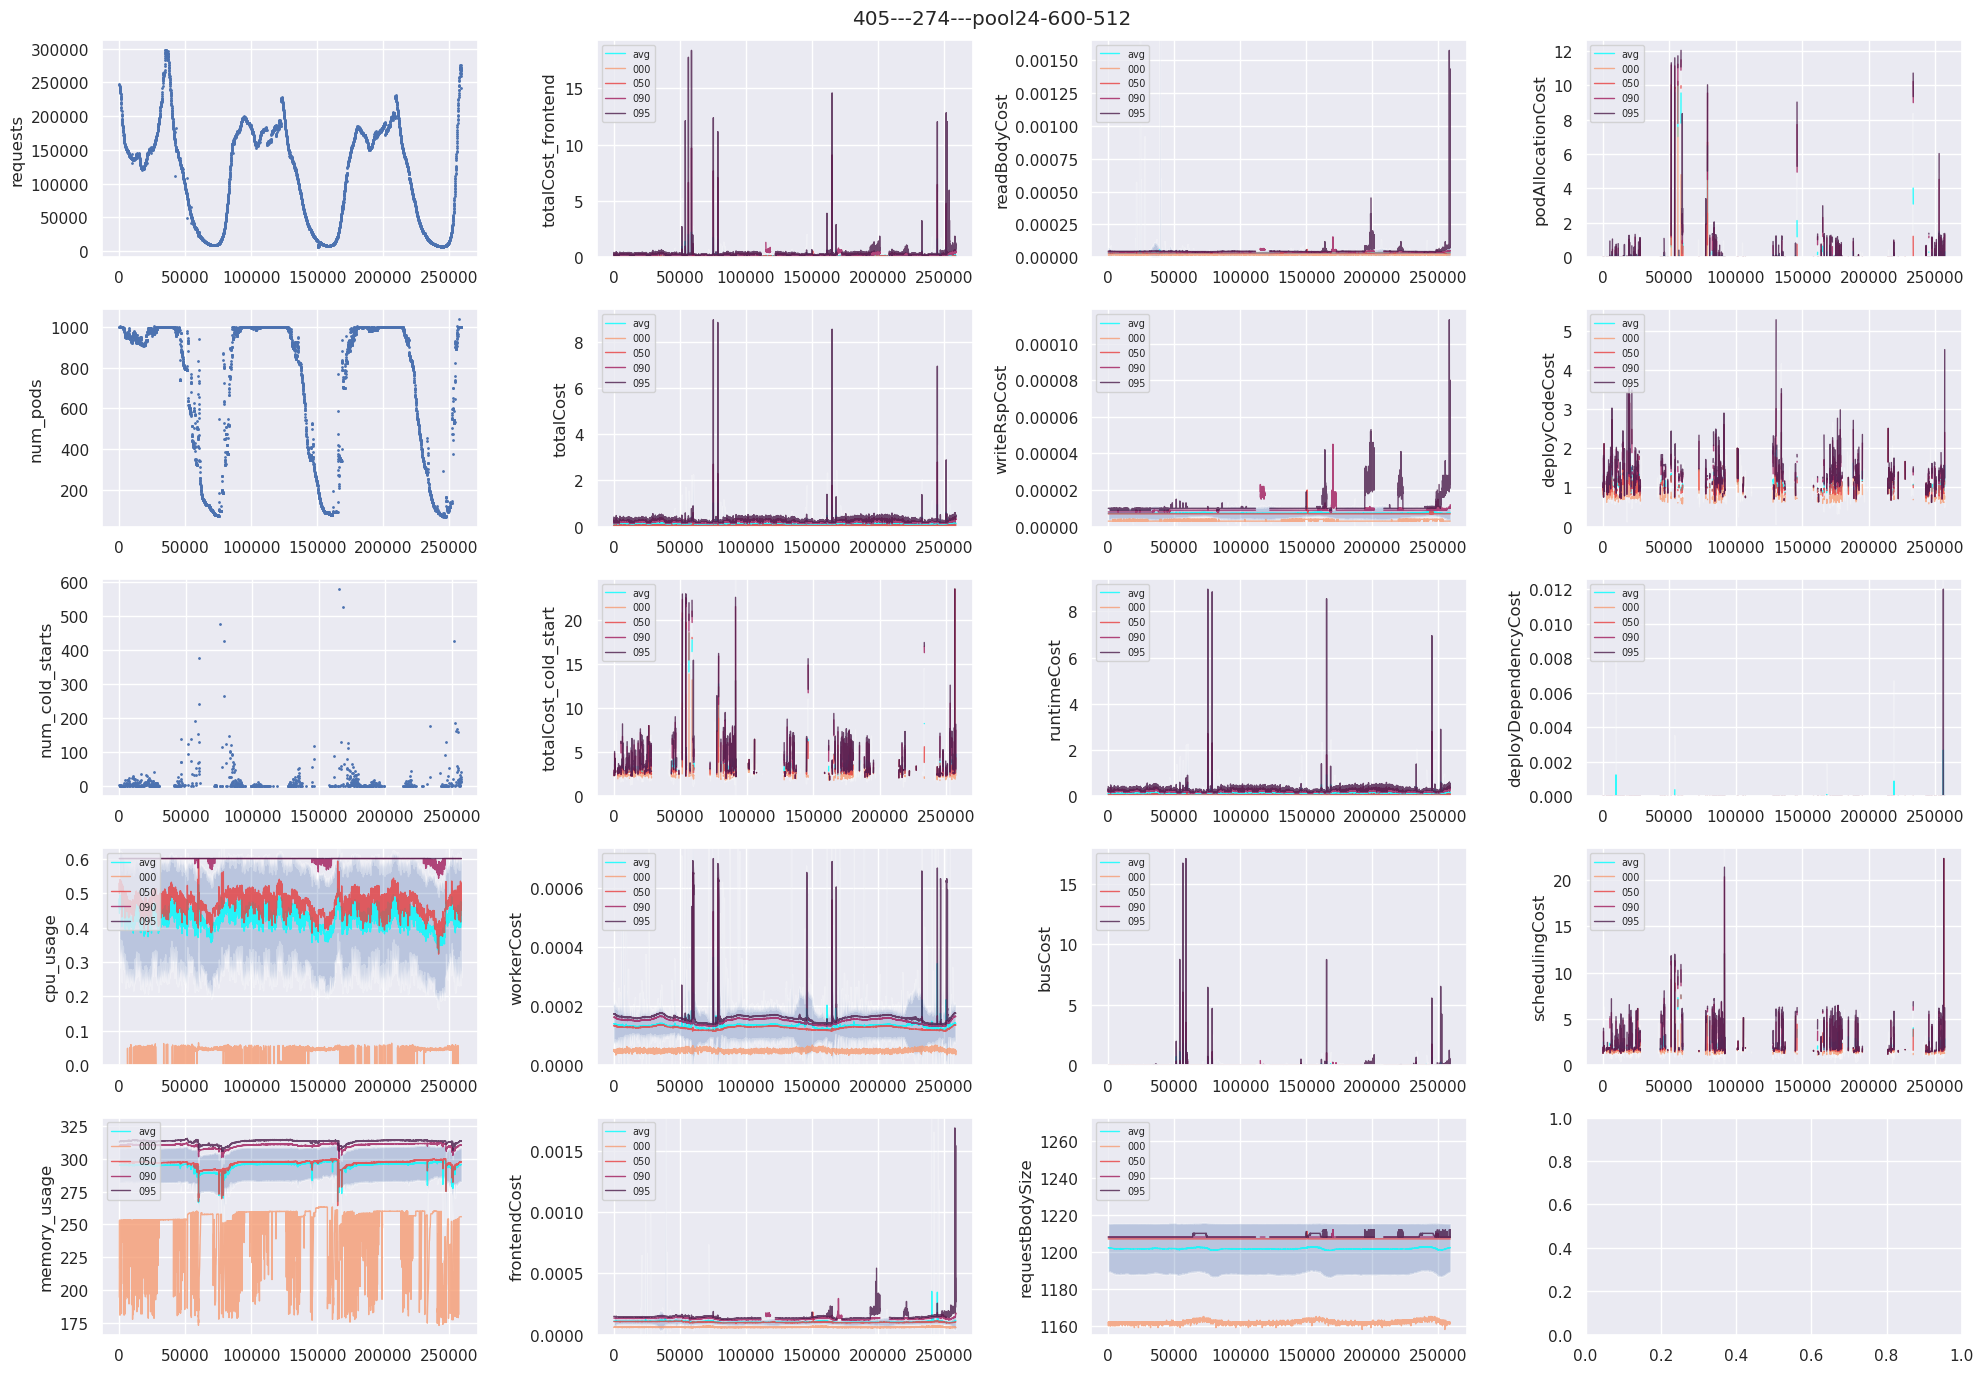

 40%|████      | 4/10 [00:30<00:46,  7.72s/it]


No metrics left


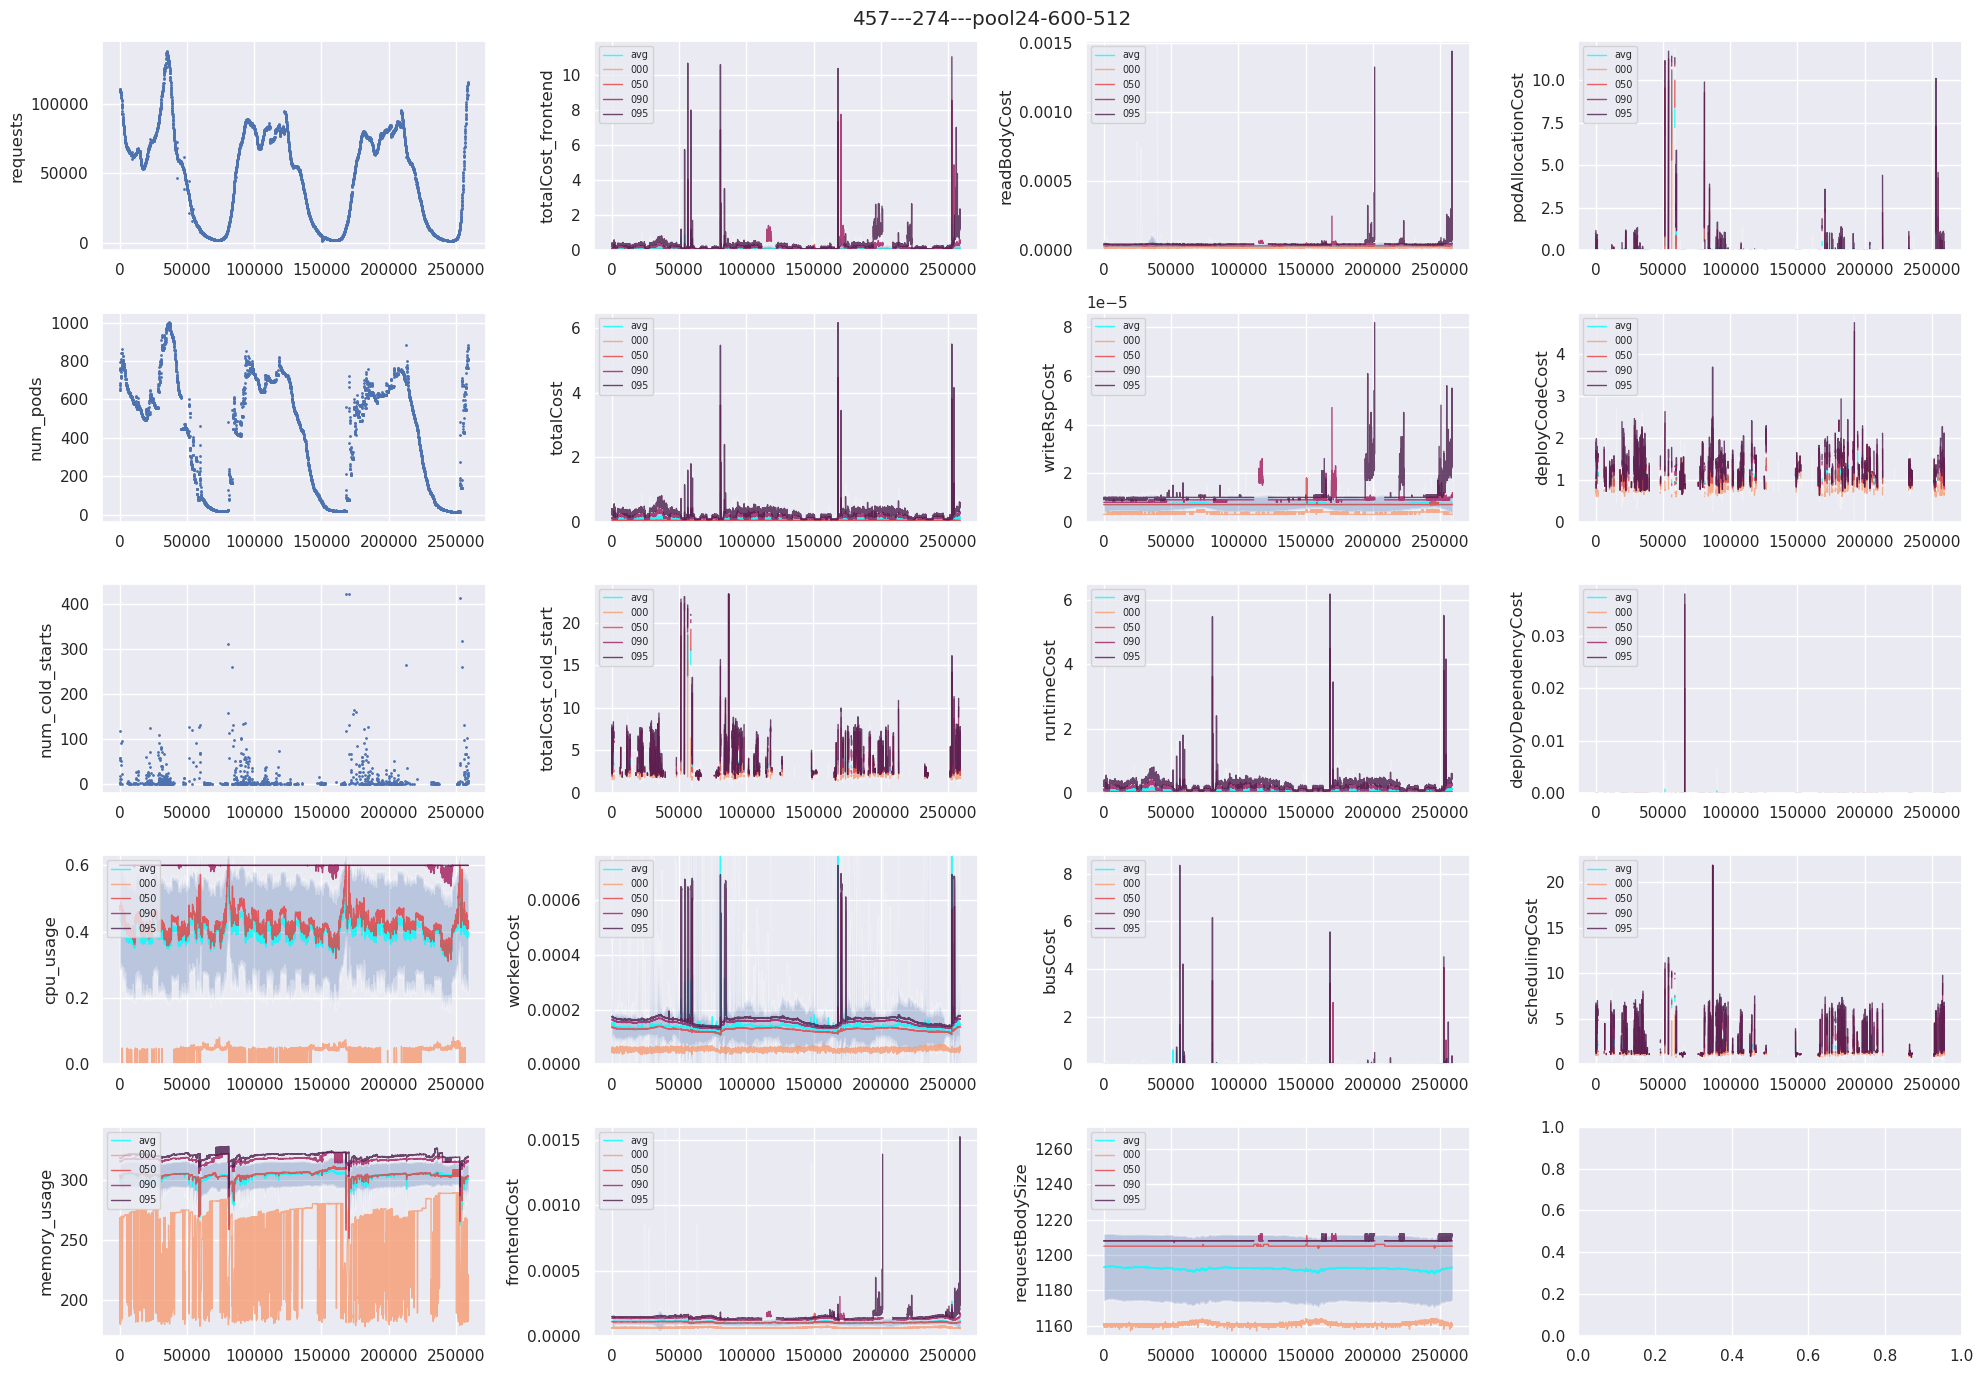

 50%|█████     | 5/10 [00:38<00:38,  7.65s/it]


No metrics left


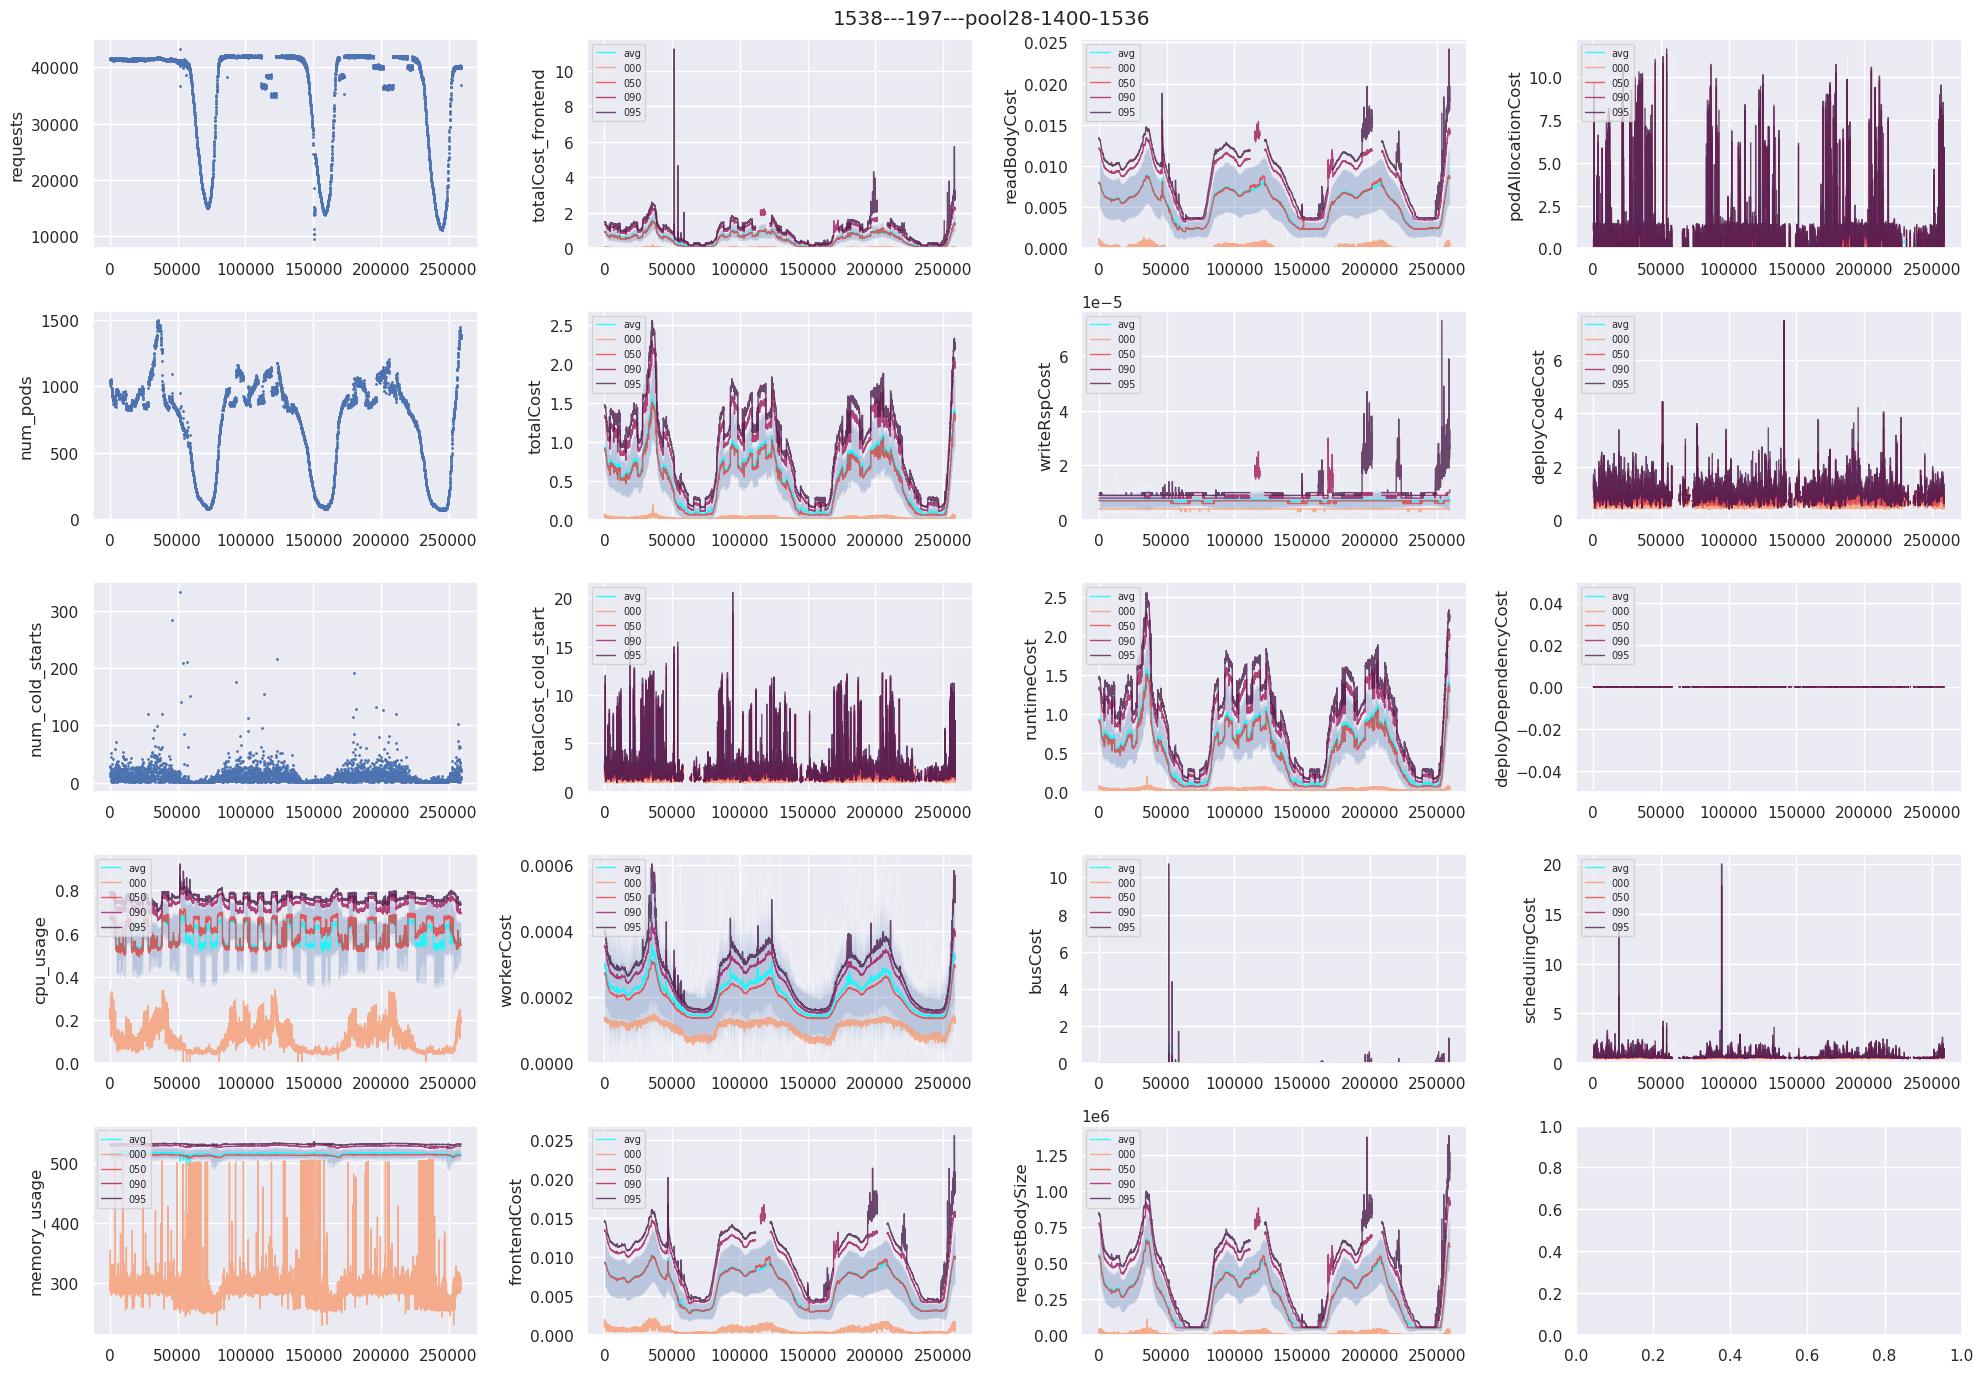

 60%|██████    | 6/10 [00:46<00:30,  7.73s/it]


No metrics left


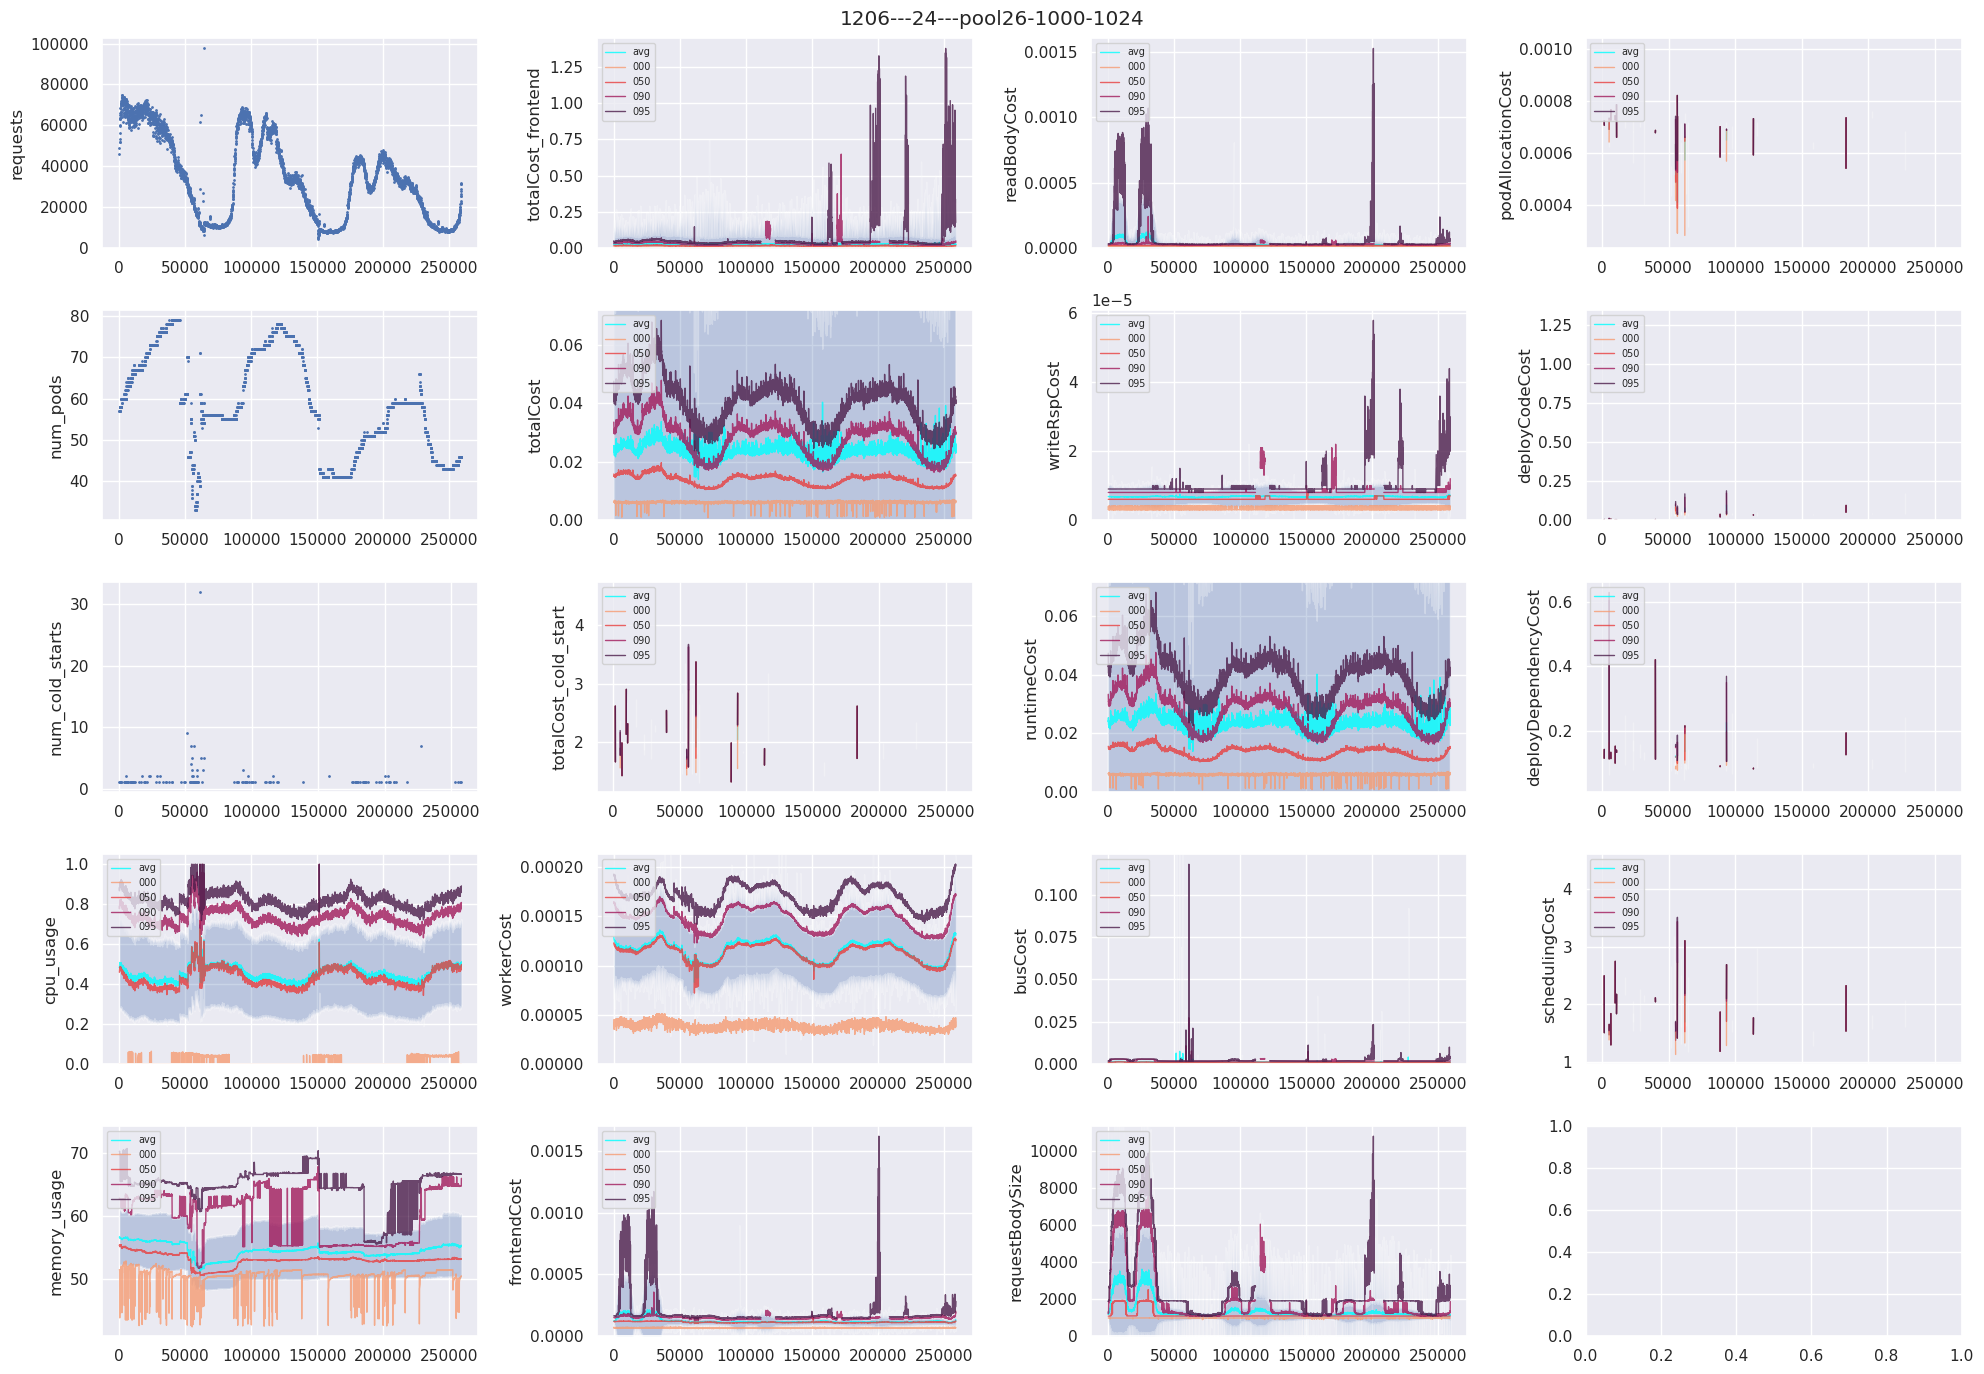

 70%|███████   | 7/10 [00:52<00:21,  7.31s/it]


No metrics left


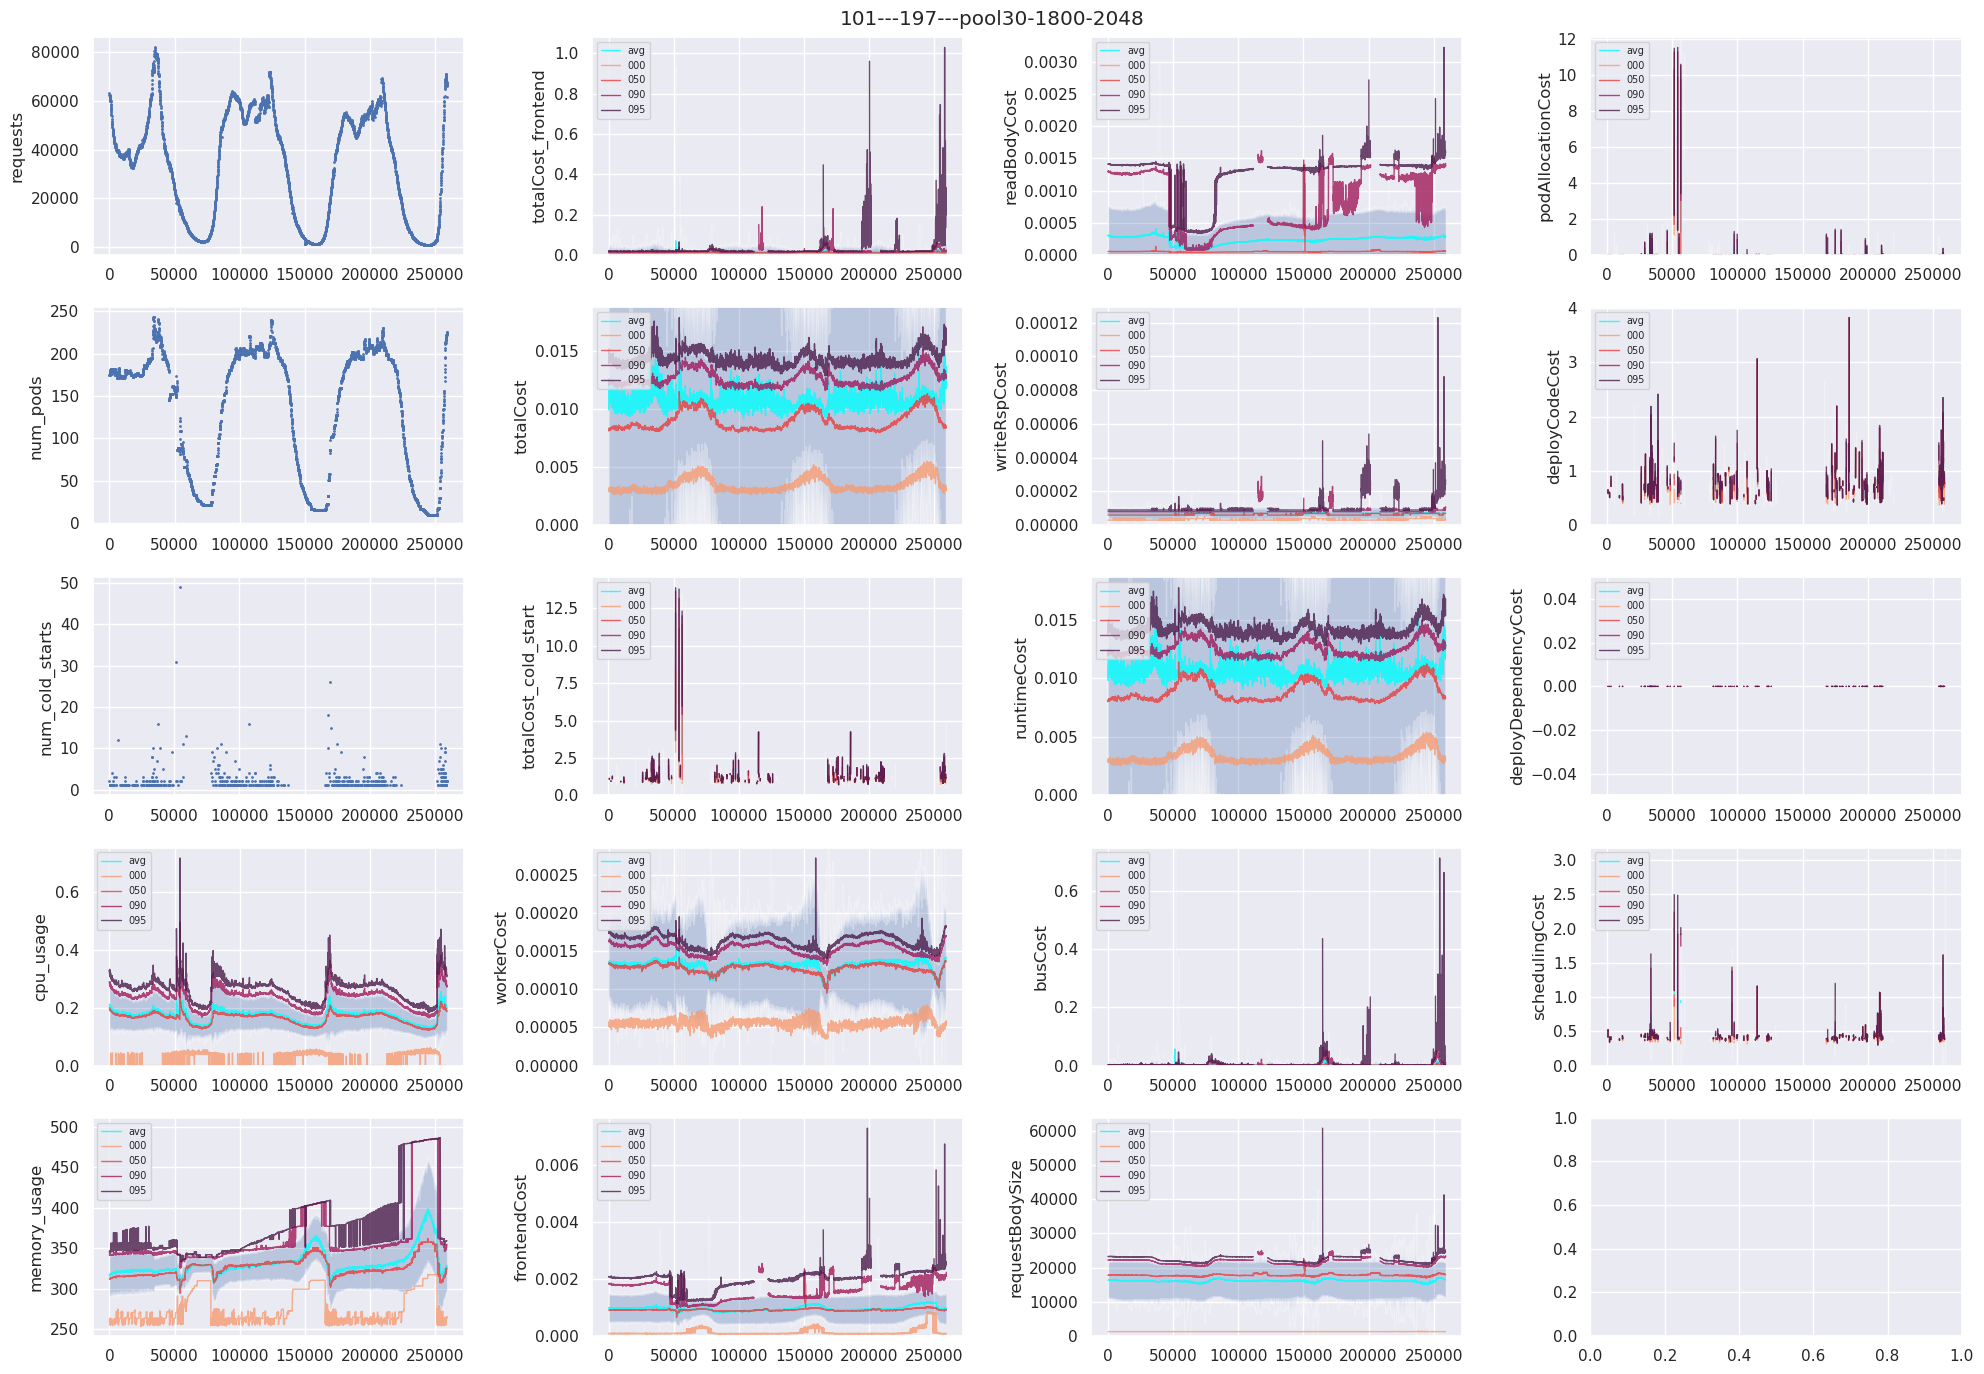

 80%|████████  | 8/10 [00:59<00:14,  7.23s/it]


No metrics left


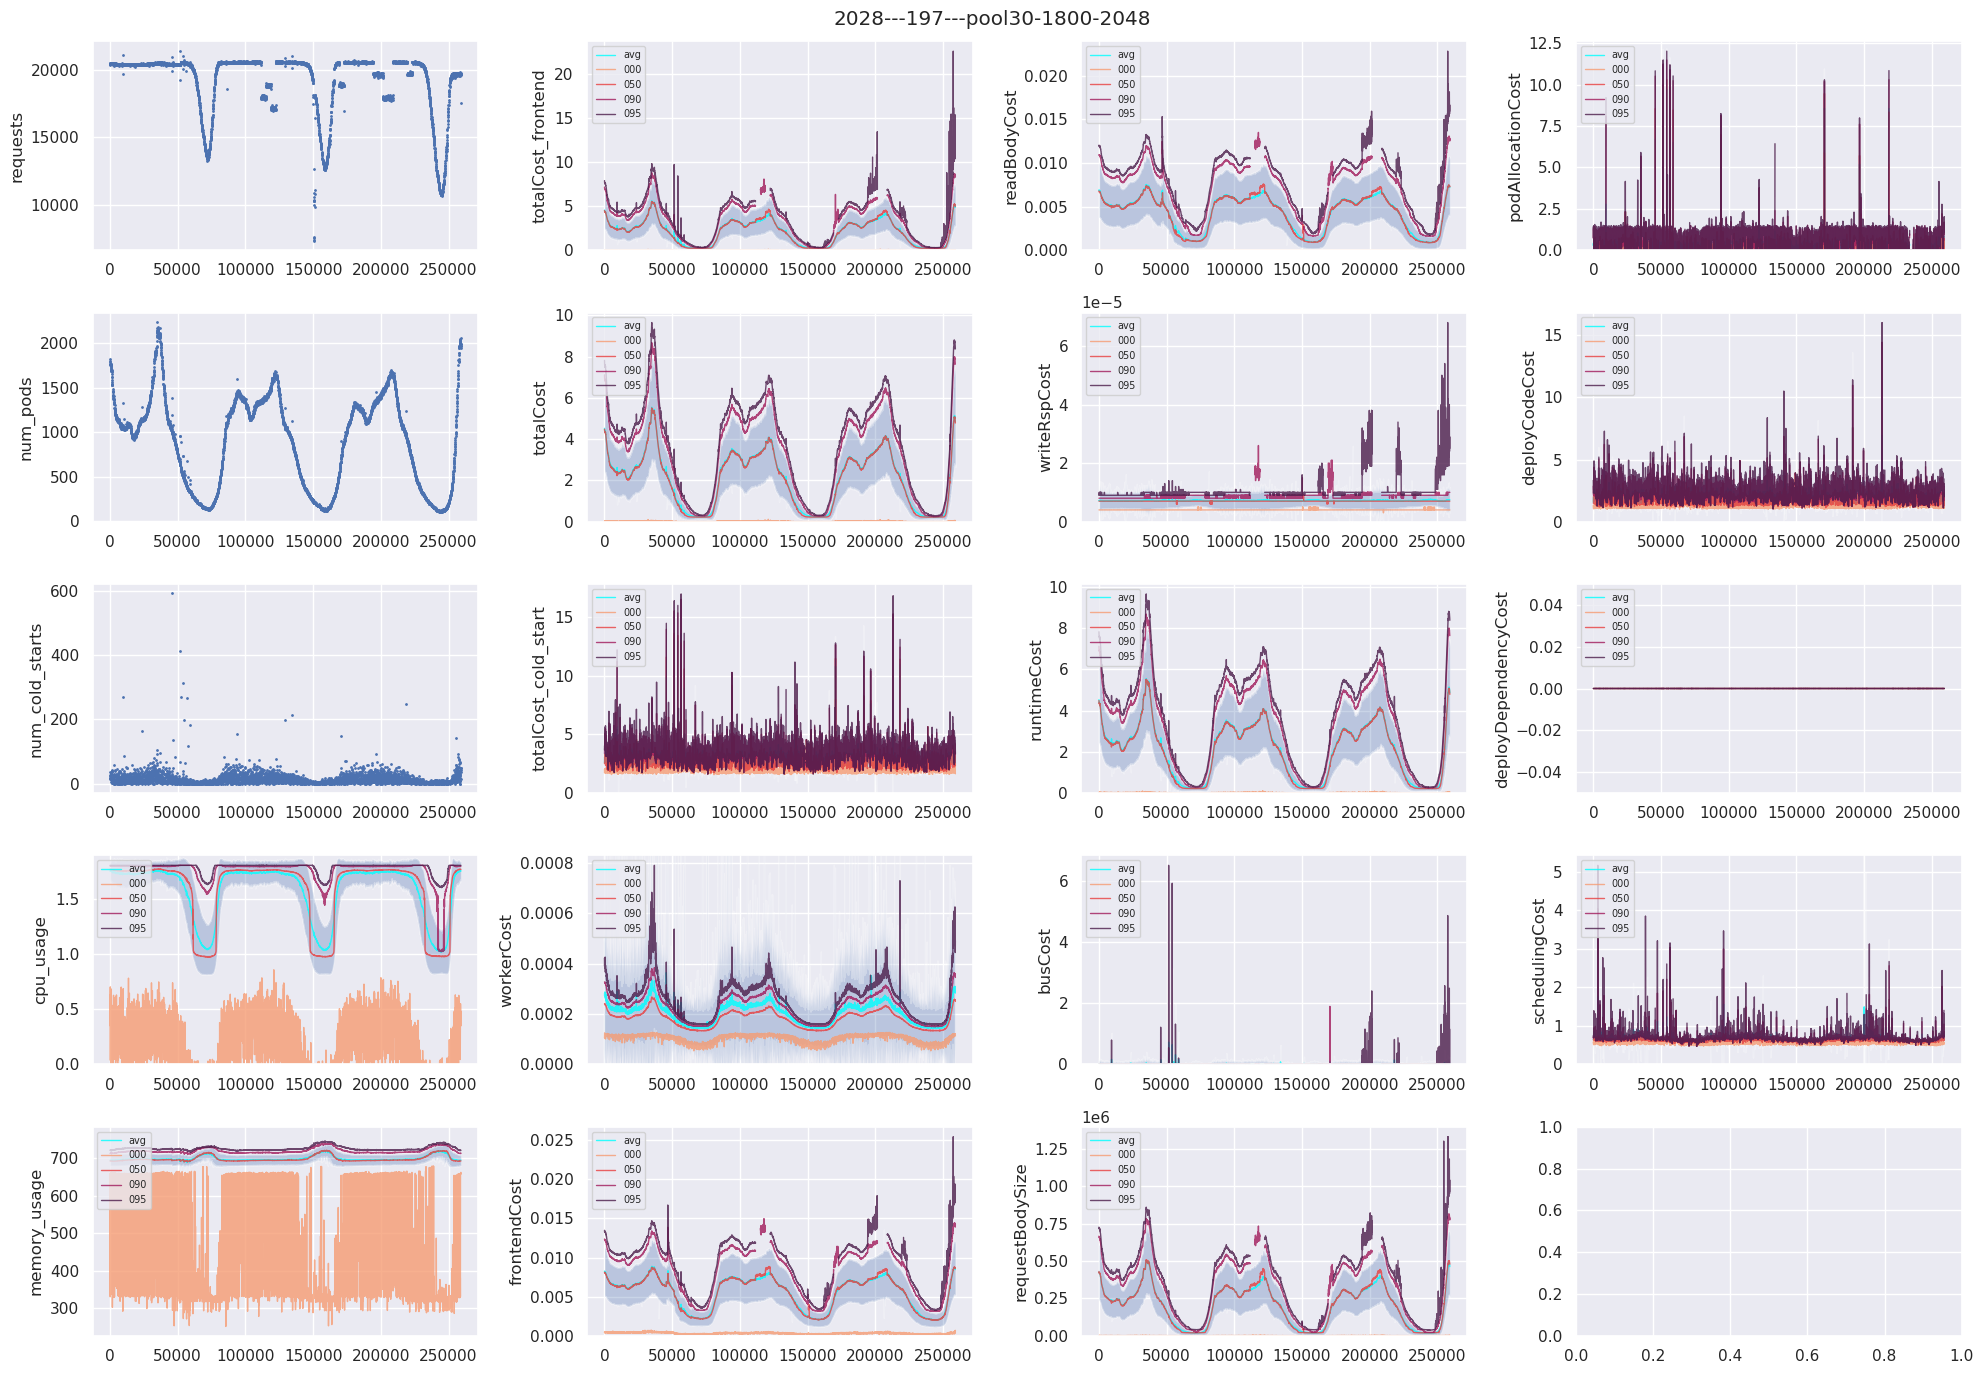

 90%|█████████ | 9/10 [01:07<00:07,  7.44s/it]


No metrics left


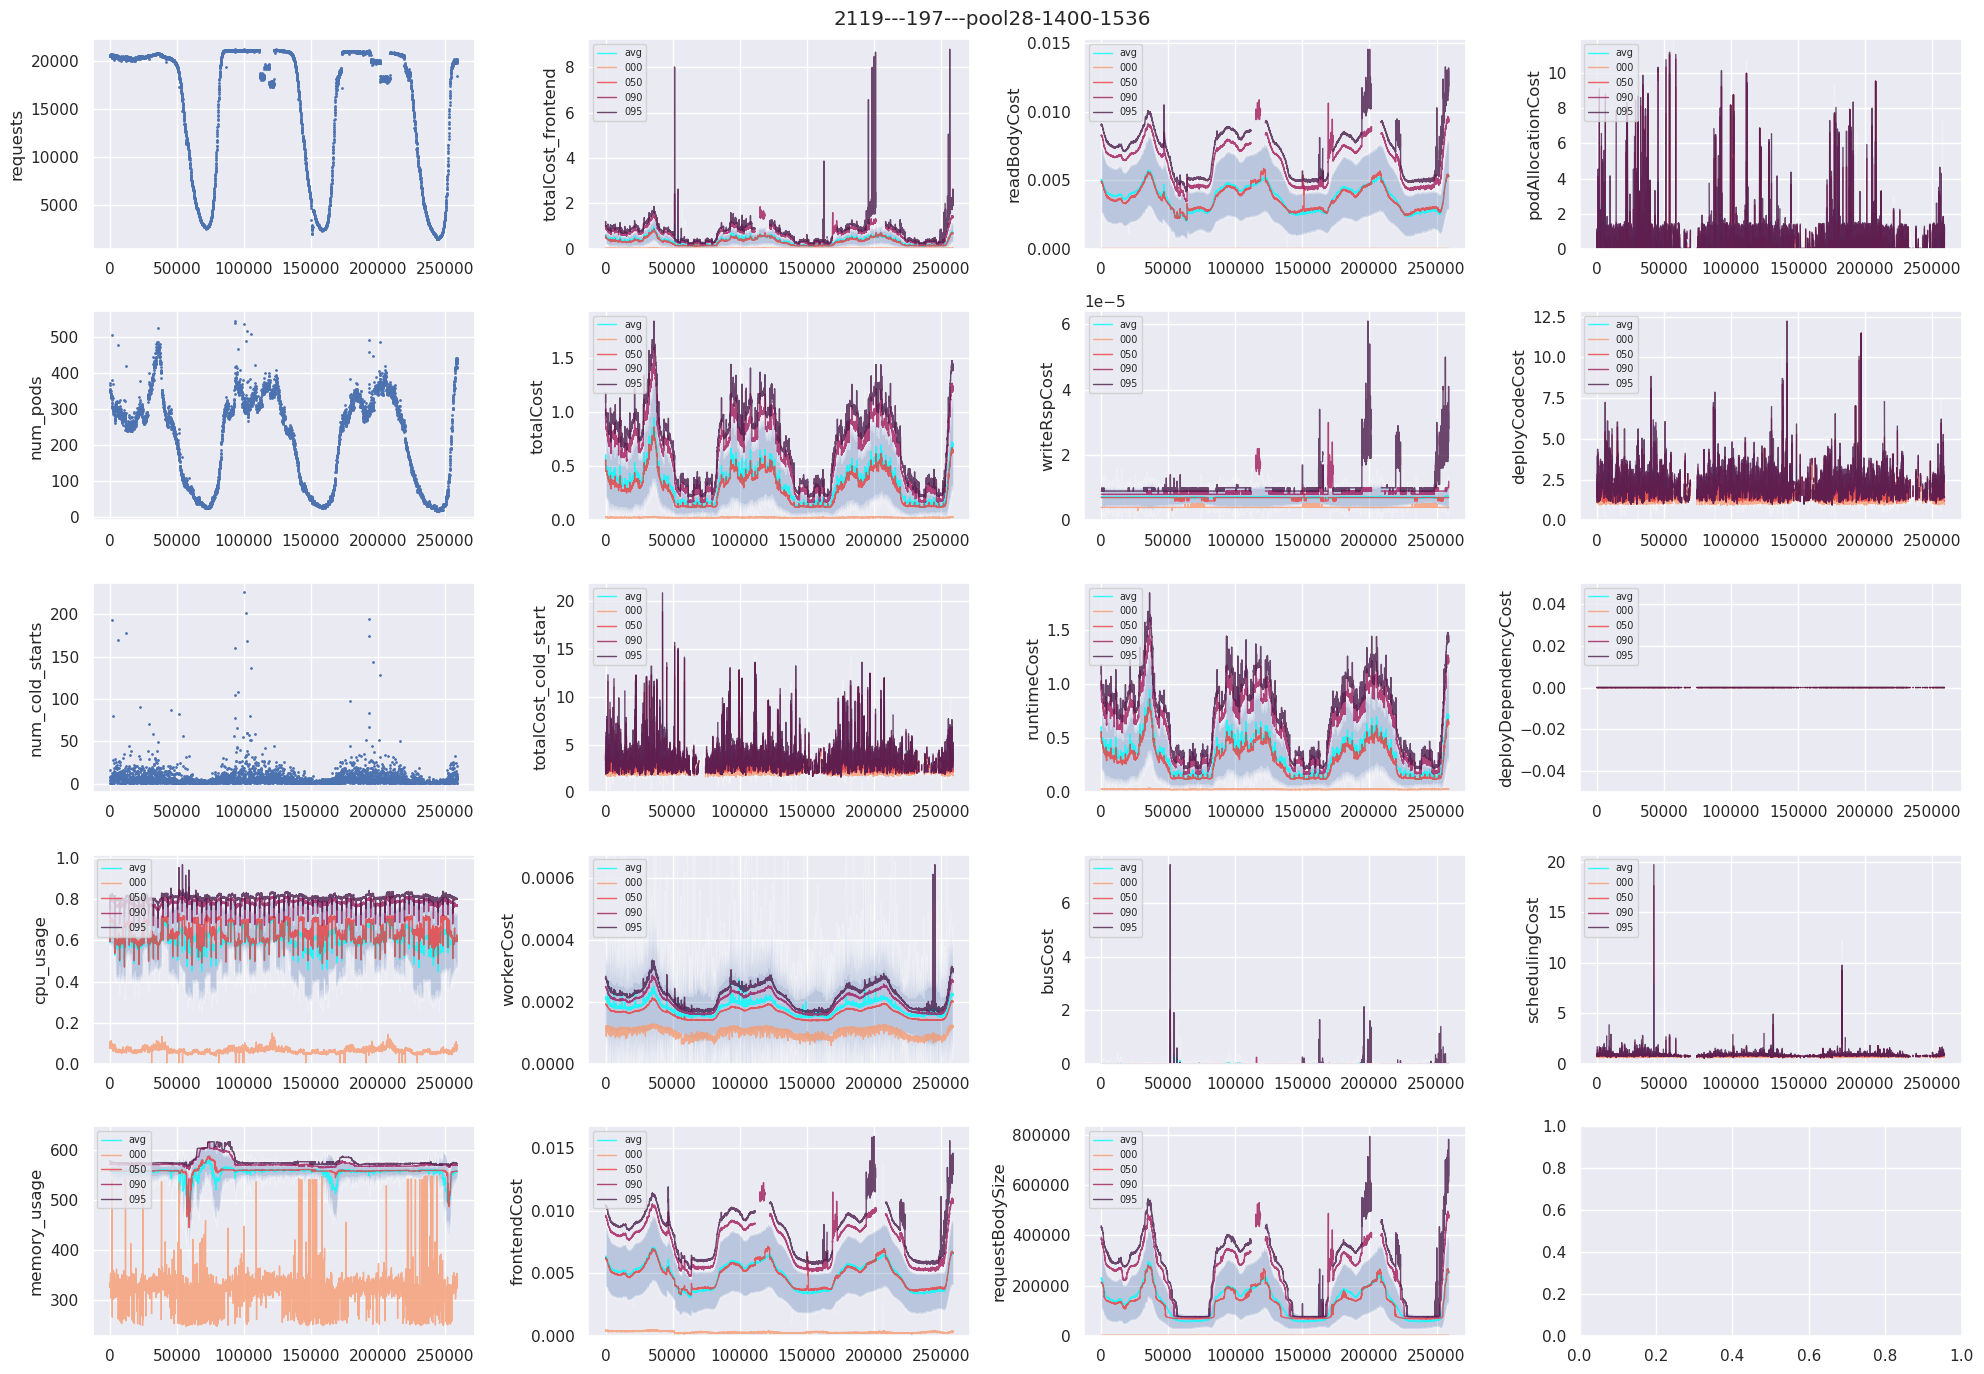

100%|██████████| 10/10 [01:15<00:00,  7.57s/it]


In [37]:
for funcID in tqdm(funcID_list):

    # ordered_metrics_family_list = ['requests', 'num_pods', 'num_nodes', 'null_nodeIP_count', 'cpu_usage', 'memory_usage', 'totalCost', 'totalCost_frontend', 'requestBodySize', 'readBodyCost', 'writeRspCost', 'busCost', 'frontendWorkerCost', 'frontendCost', 'runtimeCost', 'workerCost']
    # ordered_metrics_family_list = ['requests', 'num_pods', 'num_nodes', 'null_nodeIP_count', 'cpu_usage', 'memory_usage', 'totalCost']
    ordered_metrics_family_list = list(metrics_dict.keys())
    ordered_metrics_family_list = iter(ordered_metrics_family_list)

    # Create a 4-row subplot layout
    fig, ax = plt.subplots(5, 4, figsize=(20, 14))

    # try:

    for col_idx in [0,1,2,3]:

        for row_idx in [0,1,2,3,4]:

            try:
                metric_family = next(ordered_metrics_family_list)
                metric_family_dict = metrics_dict[metric_family]

                if len(metric_family_dict)==1:
                    df_i = metric_family_dict['sum']

                    ax[row_idx, col_idx].scatter(df_i['time'], df_i[funcID], s=1)
                    ax[row_idx, col_idx].set_ylabel(metric_family)

                else:
                    
                    # Avg and std plots
                    ax[row_idx, col_idx].plot(metric_family_dict['avg']['time'], metric_family_dict['avg'][funcID], label = 'avg', c='cyan', alpha=0.8, linewidth=1)

                    std_upper = metric_family_dict['avg'][funcID] - metric_family_dict['std'][funcID]
                    std_lower = metric_family_dict['avg'][funcID] + metric_family_dict['std'][funcID]
                    ax[row_idx, col_idx].fill_between(metric_family_dict['avg']['time'], std_lower, std_upper, alpha=0.3, facecolor='b')
                    

                    # Quantile plots
                    q_list = sorted(metric_family_dict.keys())
                    q_list = [item for item in q_list if 'quantile' in item]
                    
                    max_ylim = -9999
                    c_list = sns.color_palette('rocket_r', len(q_list))
                    for i, q_i in enumerate(q_list):
                        df_q_i = metric_family_dict[q_i]
                        ax[row_idx, col_idx].plot(df_q_i['time'], df_q_i[funcID], label = q_i.replace('quantile_','').replace(metric_family,''), c=c_list[i], alpha=0.8, linewidth=1)
                        ax[row_idx, col_idx].set_ylabel(metric_family)

                        max_ylim_i = df_q_i[funcID].max()
                        if max_ylim<max_ylim_i:
                            max_ylim = max_ylim_i

                    # ax[row_idx, col_idx].plot(metric_family_dict['avg']['timestamp'], metric_family_dict['avg'][funcID], label = 'avg', c='k', alpha=0.8)

                    # std_upper = metric_family_dict['avg'][funcID] - metric_family_dict['std'][funcID]
                    # std_lower = metric_family_dict['avg'][funcID] + metric_family_dict['std'][funcID]
                    # ax[row_idx, col_idx].fill_between(metric_family_dict['avg']['timestamp'], std_lower, std_upper, alpha=0.3, facecolor='b')
                    
                    ax[row_idx, col_idx].legend(loc = 'upper left', fontsize=7)             

                    ax[row_idx, col_idx].set_ylim(None, max_ylim*1.05)
                    if ax[row_idx, col_idx].get_ylim()[0]<0:
                        ax[row_idx, col_idx].set_ylim(0, max_ylim*1.05)
            except Exception as e:
                print(e)
                print('No metrics left\r')

    fig.suptitle(funcID)

    plt.tight_layout()
    plt.show()
        # save_str = f'{experiment_path}/{funcID}.png'
        # plt.savefig(save_str, dpi=50)
        # print(f'Saved to {save_str}')


# Region 2 with runtimes and trigger types

In [10]:
df_runtime_triggerType = pd.read_csv(rt_funcID_runtime_triggerType)
df_runtime_triggerType

funcID  cpu_request  runtime  \
0       400---418---pool22-300-128          100  Python3   
1      1531---418---pool22-300-128          100  Node.js   
2      343---1077---pool22-300-128          100     Java   
3       343---420---pool22-300-128          100     Java   
4      343---1095---pool22-300-128          100     Java   
...                            ...          ...      ...   
2413  565---486---pool30-1800-2048         1000     http   
2414   1060---777---pool23-400-256          125  Python3   
2415    673---777---pool23-400-256          125  Python3   
2416   1812---777---pool23-400-256          125  Python3   
2417   2134---777---pool23-400-256          125  Python3   

     triggerType-invocationType  
0                    workflow-S  
1                    workflow-S  
2                    workflow-S  
3                    workflow-S  
4                    workflow-S  
...                         ...  
2413                     APIG-S  
2414            unknown-unknown  
2415            unknown-unknown  
2416            unknown-unknown  
2417            unknown-unknown  

[2418 rows x 4 columns]

<Axes: title={'center': 'Number of functions by runtime'}>

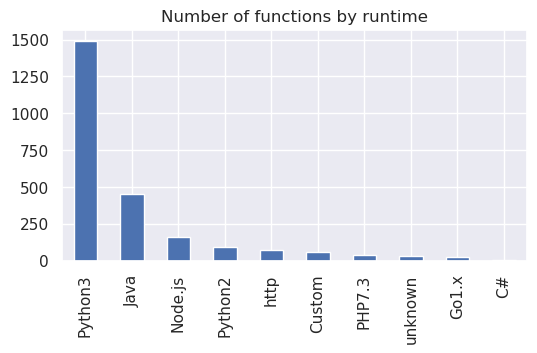

In [11]:
df_runtime_triggerType['runtime'].value_counts(dropna=False).plot(kind='bar', figsize=(6,3), title='Number of functions by runtime')

<Axes: title={'center': 'Number of functions by trigger combination'}>

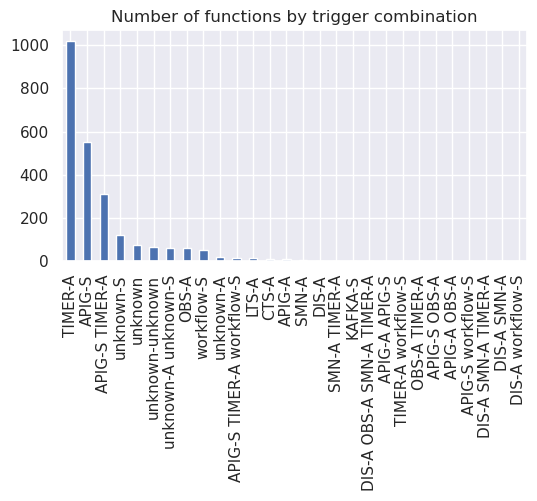

In [12]:
df_runtime_triggerType['triggerType-invocationType'].value_counts(dropna=False).plot(kind='bar', figsize=(6,3), title='Number of functions by trigger combination')

In [13]:
df_R2 = df_cold_start_dict['R2'].copy()
df_R2['poolName'] = df_R2['podID'].str.split('-').str[:3].str.join('-')
df_R2['funcID'] = df_R2['funcName'].astype(str) + '---' + df_R2['userID'].astype(str) + '---' + df_R2['poolName']
df_R2

day         time  clusterName  funcName  userID  \
0        0        0.323            1       979    1111   
1        0        0.328            2       743     418   
2        0        0.361            3      2028     481   
3        0        0.362            3       167     296   
4        0        0.364            3       272     525   
...    ...          ...          ...       ...     ...   
63144   30  2678388.653            2      1607     923   
63145   30  2678390.987            1       612      63   
63146   30  2678391.260            1       612      63   
63147   30  2678391.320            1       612      63   
63148   30  2678395.264            2      1483     709   

                                               requestID  totalCost  \
0      e8cc4228b32e4a8fcf7c164ca62cf5a1569305bb7d3121...   0.289404   
1      f554e1c7fa2222b458d5764910e2d1ee3bccd2045fefce...   0.172102   
2      58b18460d4fc4a6e8419f1f7bf6da422cc3671e747974f...   0.235527   
3      f951318dc8f7e4b17ccb1fa907730aa95b3b36743a4327...   0.167989   
4      2a83c6c486f8e4b5efc798fb44f4401b5d16199f8eefd5...   0.215433   
...                                                  ...        ...   
63144  fc8e24a3cf7fbce54ed3e24d99b11ed7933e4fd1cdffda...   0.597362   
63145  ac3f447c0ee16ecf709eeab0260156efba024e15c5e7a6...   1.450608   
63146  fe7b641cb13d744d06ee954202df62dced52794b2a9504...   1.720289   
63147  9265d3477e5af0a8dde659dd878f7f1e58b4d699275a64...   1.793164   
63148  52a91dd50b12cca0465063182676ea3deac42d4761c655...   1.205189   

       podAllocationCost  deployCodeCost  deployDependencyCost  \
0               0.000243           0.213                 0.000   
1               0.000138           0.067                 0.000   
2               0.000138           0.125                 0.000   
3               0.000123           0.055                 0.000   
4               0.000152           0.074                 0.000   
...                  ...             ...                   ...   
63144           0.014675           0.136                 0.000   
63145           0.007911           0.025                 0.983   
63146           0.007843           0.028                 1.271   
63147           0.007897           0.052                 1.217   
63148           0.000287           0.034                 0.000   

       schedulingCost                      podID region        poolName  \
0            0.076161  pool22-300-128-0001562370     R2  pool22-300-128   
1            0.104964  pool22-300-128-0000600630     R2  pool22-300-128   
2            0.110389  pool22-300-128-0001444785     R2  pool22-300-128   
3            0.112866  pool22-300-128-0001443980     R2  pool22-300-128   
4            0.141281  pool22-300-128-0001092850     R2  pool22-300-128   
...               ...                        ...    ...             ...   
63144        0.446687  pool22-300-128-0000196449     R2  pool22-300-128   
63145        0.434697  pool22-300-128-0001377502     R2  pool22-300-128   
63146        0.413446  pool22-300-128-0000044339     R2  pool22-300-128   
63147        0.516267  pool22-300-128-0001700101     R2  pool22-300-128   
63148        1.170902  pool22-300-128-0000126869     R2  pool22-300-128   

                            funcID  
0      979---1111---pool22-300-128  
1       743---418---pool22-300-128  
2      2028---481---pool22-300-128  
3       167---296---pool22-300-128  
4       272---525---pool22-300-128  
...                            ...  
63144  1607---923---pool22-300-128  
63145    612---63---pool22-300-128  
63146    612---63---pool22-300-128  
63147    612---63---pool22-300-128  
63148  1483---709---pool22-300-128  

[2072823 rows x 15 columns]

In [14]:
df_R2 = pd.merge(left=df_R2, right=df_runtime_triggerType, on='funcID', how='left')
df_R2

day         time  clusterName  funcName  userID  \
0          0        0.323            1       979    1111   
1          0        0.328            2       743     418   
2          0        0.361            3      2028     481   
3          0        0.362            3       167     296   
4          0        0.364            3       272     525   
...      ...          ...          ...       ...     ...   
2072818   30  2678388.653            2      1607     923   
2072819   30  2678390.987            1       612      63   
2072820   30  2678391.260            1       612      63   
2072821   30  2678391.320            1       612      63   
2072822   30  2678395.264            2      1483     709   

                                                 requestID  totalCost  \
0        e8cc4228b32e4a8fcf7c164ca62cf5a1569305bb7d3121...   0.289404   
1        f554e1c7fa2222b458d5764910e2d1ee3bccd2045fefce...   0.172102   
2        58b18460d4fc4a6e8419f1f7bf6da422cc3671e747974f...   0.235527   
3        f951318dc8f7e4b17ccb1fa907730aa95b3b36743a4327...   0.167989   
4        2a83c6c486f8e4b5efc798fb44f4401b5d16199f8eefd5...   0.215433   
...                                                    ...        ...   
2072818  fc8e24a3cf7fbce54ed3e24d99b11ed7933e4fd1cdffda...   0.597362   
2072819  ac3f447c0ee16ecf709eeab0260156efba024e15c5e7a6...   1.450608   
2072820  fe7b641cb13d744d06ee954202df62dced52794b2a9504...   1.720289   
2072821  9265d3477e5af0a8dde659dd878f7f1e58b4d699275a64...   1.793164   
2072822  52a91dd50b12cca0465063182676ea3deac42d4761c655...   1.205189   

         podAllocationCost  deployCodeCost  deployDependencyCost  \
0                 0.000243           0.213                 0.000   
1                 0.000138           0.067                 0.000   
2                 0.000138           0.125                 0.000   
3                 0.000123           0.055                 0.000   
4                 0.000152           0.074                 0.000   
...                    ...             ...                   ...   
2072818           0.014675           0.136                 0.000   
2072819           0.007911           0.025                 0.983   
2072820           0.007843           0.028                 1.271   
2072821           0.007897           0.052                 1.217   
2072822           0.000287           0.034                 0.000   

         schedulingCost                      podID region        poolName  \
0              0.076161  pool22-300-128-0001562370     R2  pool22-300-128   
1              0.104964  pool22-300-128-0000600630     R2  pool22-300-128   
2              0.110389  pool22-300-128-0001444785     R2  pool22-300-128   
3              0.112866  pool22-300-128-0001443980     R2  pool22-300-128   
4              0.141281  pool22-300-128-0001092850     R2  pool22-300-128   
...                 ...                        ...    ...             ...   
2072818        0.446687  pool22-300-128-0000196449     R2  pool22-300-128   
2072819        0.434697  pool22-300-128-0001377502     R2  pool22-300-128   
2072820        0.413446  pool22-300-128-0000044339     R2  pool22-300-128   
2072821        0.516267  pool22-300-128-0001700101     R2  pool22-300-128   
2072822        1.170902  pool22-300-128-0000126869     R2  pool22-300-128   

                              funcID  cpu_request  runtime  \
0        979---1111---pool22-300-128          100  Python3   
1         743---418---pool22-300-128          100  Node.js   
2        2028---481---pool22-300-128          100  Node.js   
3         167---296---pool22-300-128          100  Node.js   
4         272---525---pool22-300-128          100  Python3   
...                              ...          ...      ...   
2072818  1607---923---pool22-300-128          100  Python3   
2072819    612---63---pool22-300-128          100  Python3   
2072820    612---63---pool22-300-128          100  Python3   
2072821    612---63---pool22-300-128          100

In [15]:
df_R2['runtime'].value_counts(dropna=False)

Python3    1190731
Node.js     287253
Custom      186452
Java        165695
Python2     165673
Go1.x        30045
PHP7.3       25591
http         18167
C#            3105
unknown        111
Name: runtime, dtype: int64

In [16]:
sns.histplot(data=df_R2, 
             bins=500,
             fill=False,
             element="step",
             x='totalCost', 
             hue='runtime', 
             stat='probability', 
             cumulative=True, 
             log_scale=[True,False], 
             common_norm=False)

<Axes: xlabel='totalCost', ylabel='Probability'>